In [13]:
import sys
from vispy import color
from vispy import scene
from vispy import app, plot
import pylab
import matplotlib.pyplot as plt
import matplotlib.dates as md
import recviewer
from astropy.io import fits
from astropy.utils.data import download_file
import numpy as np
import math

In [8]:
def waterfall(signal, sample_rate=None, bins = 4096 ):
    waterfall = recviewer.waterfallize(signal, bins)
    #waterfall = waterfallize(signal, bins)
    waterfall[np.isneginf(waterfall)] = np.nan
    wmin, wmax = np.nanmin(waterfall), np.nanmax(waterfall)
#    waterfall = ((waterfall - wmin) / (wmax - wmin)) * 5.5 - 4.5
#    waterfall = cm.map(waterfall)
    return waterfall

In [9]:
import dateutil.parser
from matplotlib import dates
import datetime

raw_files = []


raw_files.append(['/home/roman/mnt/server-bh/storage/bolidozor/svakov/SVAKOV-R12/meteors/2017/09/05/20/20170905203231248_SVAKOV-R12_raws.fits','SVAKOV-R12 - 1'])
raw_files.append(['/home/roman/mnt/server-bh/storage/bolidozor/svakov/SVAKOV-R12/meteors/2017/09/02/06/20170902062919368_SVAKOV-R12_raws.fits','SVAKOV-R12 - 2'])
raw_files.append(['/home/roman/mnt/server-bh/storage/bolidozor/svakov/SVAKOV-R12/meteors/2017/09/02/13/20170902132338504_SVAKOV-R12_raws.fits','SVAKOV-R12 - 3'])
#raw_files.append(['/home/roman/mnt/meteor1/storage/bolidozor/svakov/SVAKOV-R12/meteors/2017/09/05/14/20170905144351269_SVAKOV-R12_raws.fits','SVAKOV-R12'])

#raw_files.append([download_file('http://space.astro.cz/svakov/SVAKOV-R12/meteors/2017/09/05/20/20170905203231248_SVAKOV-R12_raws.fits', cache=True ),'NACHODSKO-R3'])
#raw_files.append([download_file('http://space.astro.cz/svakov/SVAKOV-R12/meteors/2017/09/05/20/20170905203231248_SVAKOV-R12_raws.fits', cache=True ),'OBSUPICE-R4'])
#raw_files.append([download_file('http://space.astro.cz/bolidozor/ZVPP/ZVPP-R2/meteors/2015/03/15/19/20150315194408977_ZVPP-R2_raws.fits', cache=True ),'ZVPP-R2'])
#raw_files.append([download_file('http://space.astro.cz/bolidozor/svakov/SVAKOV-R6/meteors/2015/03/15/19/20150315194355315_SVAKOV-R6_raws.fits', cache=True ),'SVAKOV-R6'])
#raw_files.append([download_file('http://space.astro.cz/bolidozor/uFlu/uFlu-R1/meteors/2015/03/15/19/20150315194418800_uFlu-R1_raws.fits', cache=True ),'uFlu-R1'])

2017-09-05 20:33:12 2017-09-05 20:33:25.200000
2017-09-05 04:09:29 2017-09-05 04:10:18.600000
2017-09-05 11:03:36 2017-09-05 11:03:56.800000


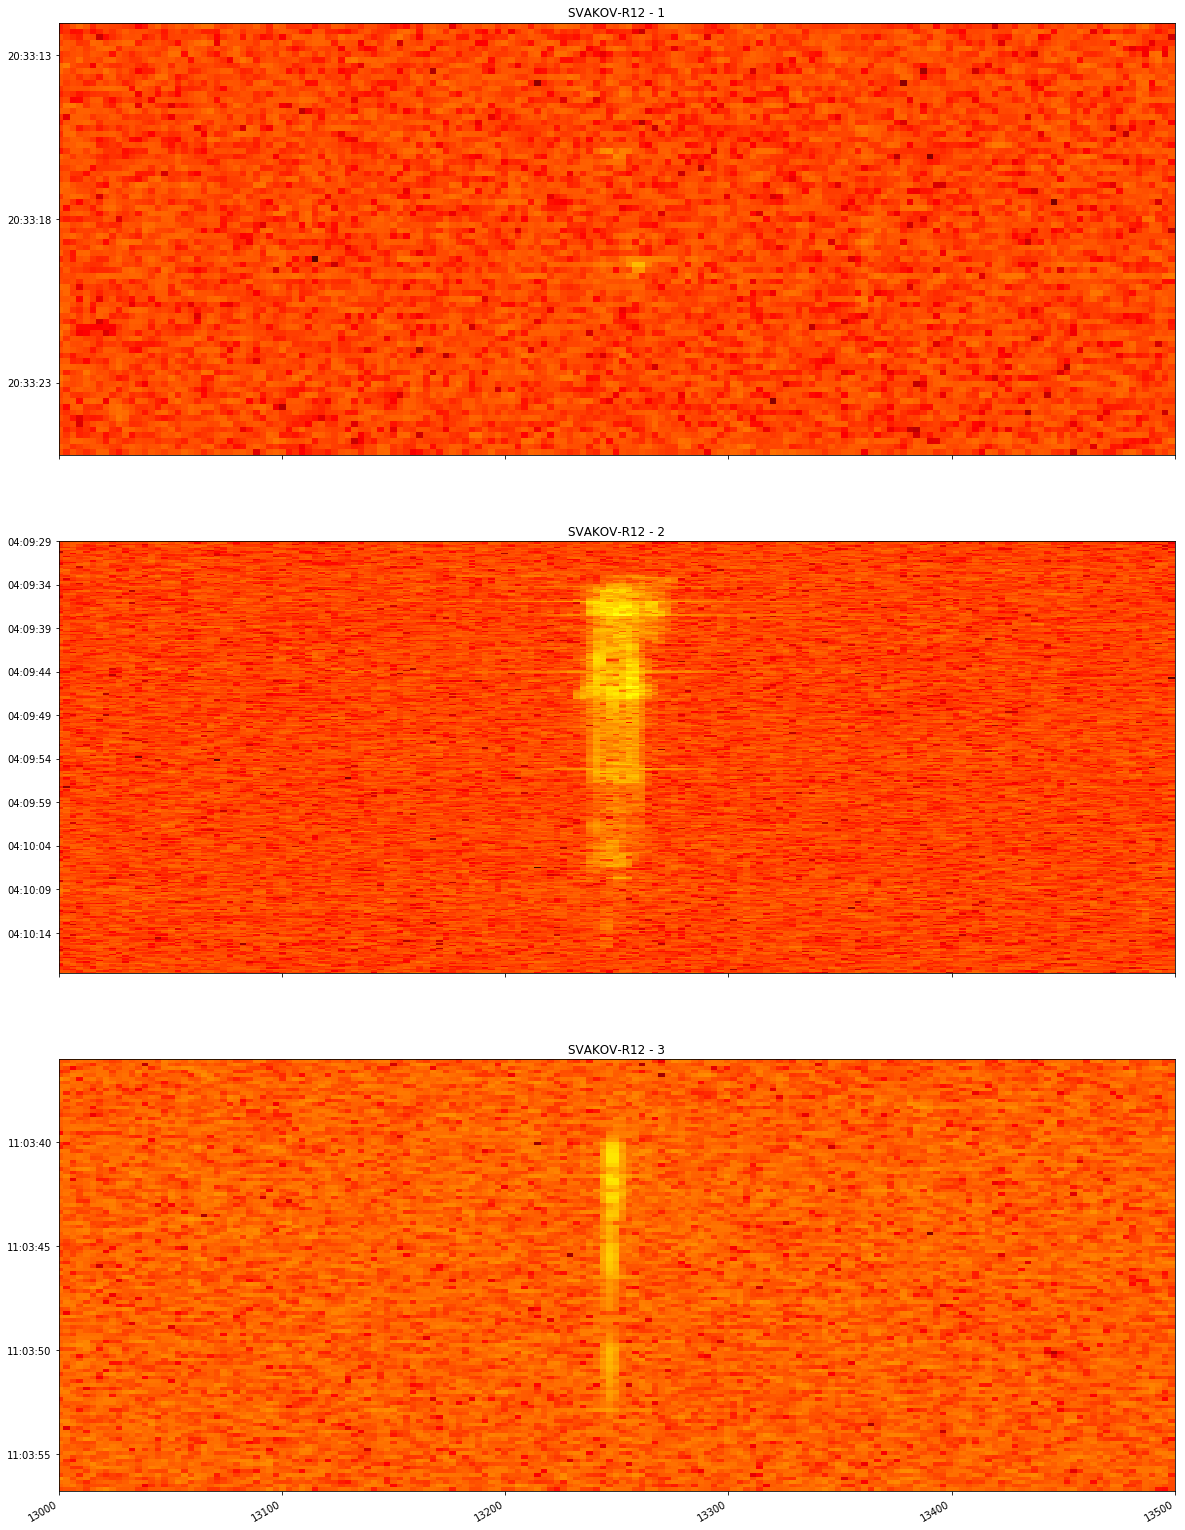

In [10]:
f = pylab.figure(figsize=(20, 30))
#fig, axes = plt.subplots(ncols=2, figsize=(8, 4))
for n, fname in enumerate(raw_files):
    hdu = fits.open(fname[0])[0]
    flat_data = np.ravel(hdu.data)
    d1 = dateutil.parser.parse(hdu.header['DATE'])
    fds1 = dates.date2num(d1) # converted
    d2 = d1 + datetime.timedelta(seconds=hdu.header['NAXIS2']/48000.0)
    fds2 = dates.date2num(d2) # converted
    arr = waterfall(flat_data[0::2] + 1j * flat_data[1::2], 48000, bins = 4096*4)
    ax = f.add_subplot(len(raw_files), 1, n + 1)  # this line outputs images on top of each other
    #f.add_subplot(1, len(raw_files), n+1)  # this line outputs images side-by-side
    #pylab.imshow(arr,  interpolation='none', aspect='auto',  extent=[-24000, 24000, fds2, fds1])
    pylab.imshow(arr,  interpolation='none', aspect='auto',  extent=[-24000, 24000, fds2, fds1])
    pylab.xlim(13000,13500)
    #ax = pylab.gca()
    ax.yaxis_date()
    date_format = md.DateFormatter('%H:%M:%S')
    ax.yaxis.set_major_formatter(date_format)
    f.autofmt_xdate()
    
    print(d1, d2)
    #pylab.ylim(735672.82209, 735672.8230)
#    pylab.set_cmap('gist_ncar')
    pylab.set_cmap('hot')
    pylab.title(fname[1])
pylab.show()
pylab.close()


In [11]:
len(raw_files)

def getTimeOfGPS(data, samplerate = 48000, sigma = 15):
    time = []
    clip_val = np.std(data)*sigma
    for i, point in enumerate(data):
        if point > clip_val: # and time[len(time)-1] < (i/samplerate + samplerate*10000):
            time.append(i/2/samplerate)
            return time

/home/roman/mnt/server-bh/storage/bolidozor/svakov/SVAKOV-R12/meteors/2017/09/05/20/20170905203231248_SVAKOV-R12_raws.fits
Vzdálenost první GPS značky od začátku souboru 7.666104166666667 s
Začátek souboru 2017-09-05 20:33:12
Konec souboru   2017-09-05 20:33:25.200000
Délka souboru   0:00:13.200000
První čásová značka       2017-09-05 20:33:19.666104 podle systémového času
Opravený čas první značky 2017-09-05 20:33:20
Opravený čas prvního řádku 2017-09-05 20:33:12.333896
Začátek souboru            2017-09-05 20:33:12
Chyba času v hlavičce fits  0:00:00.333896
/home/roman/mnt/server-bh/storage/bolidozor/svakov/SVAKOV-R12/meteors/2017/09/02/06/20170902062919368_SVAKOV-R12_raws.fits
Vzdálenost první GPS značky od začátku souboru 4.541510416666667 s
Začátek souboru 2017-09-05 04:09:29
Konec souboru   2017-09-05 04:10:18.600000
Délka souboru   0:00:49.600000
První čásová značka       2017-09-05 04:09:33.541510 podle systémového času
Opravený čas první značky 2017-09-05 04:09:30
Opravený čas

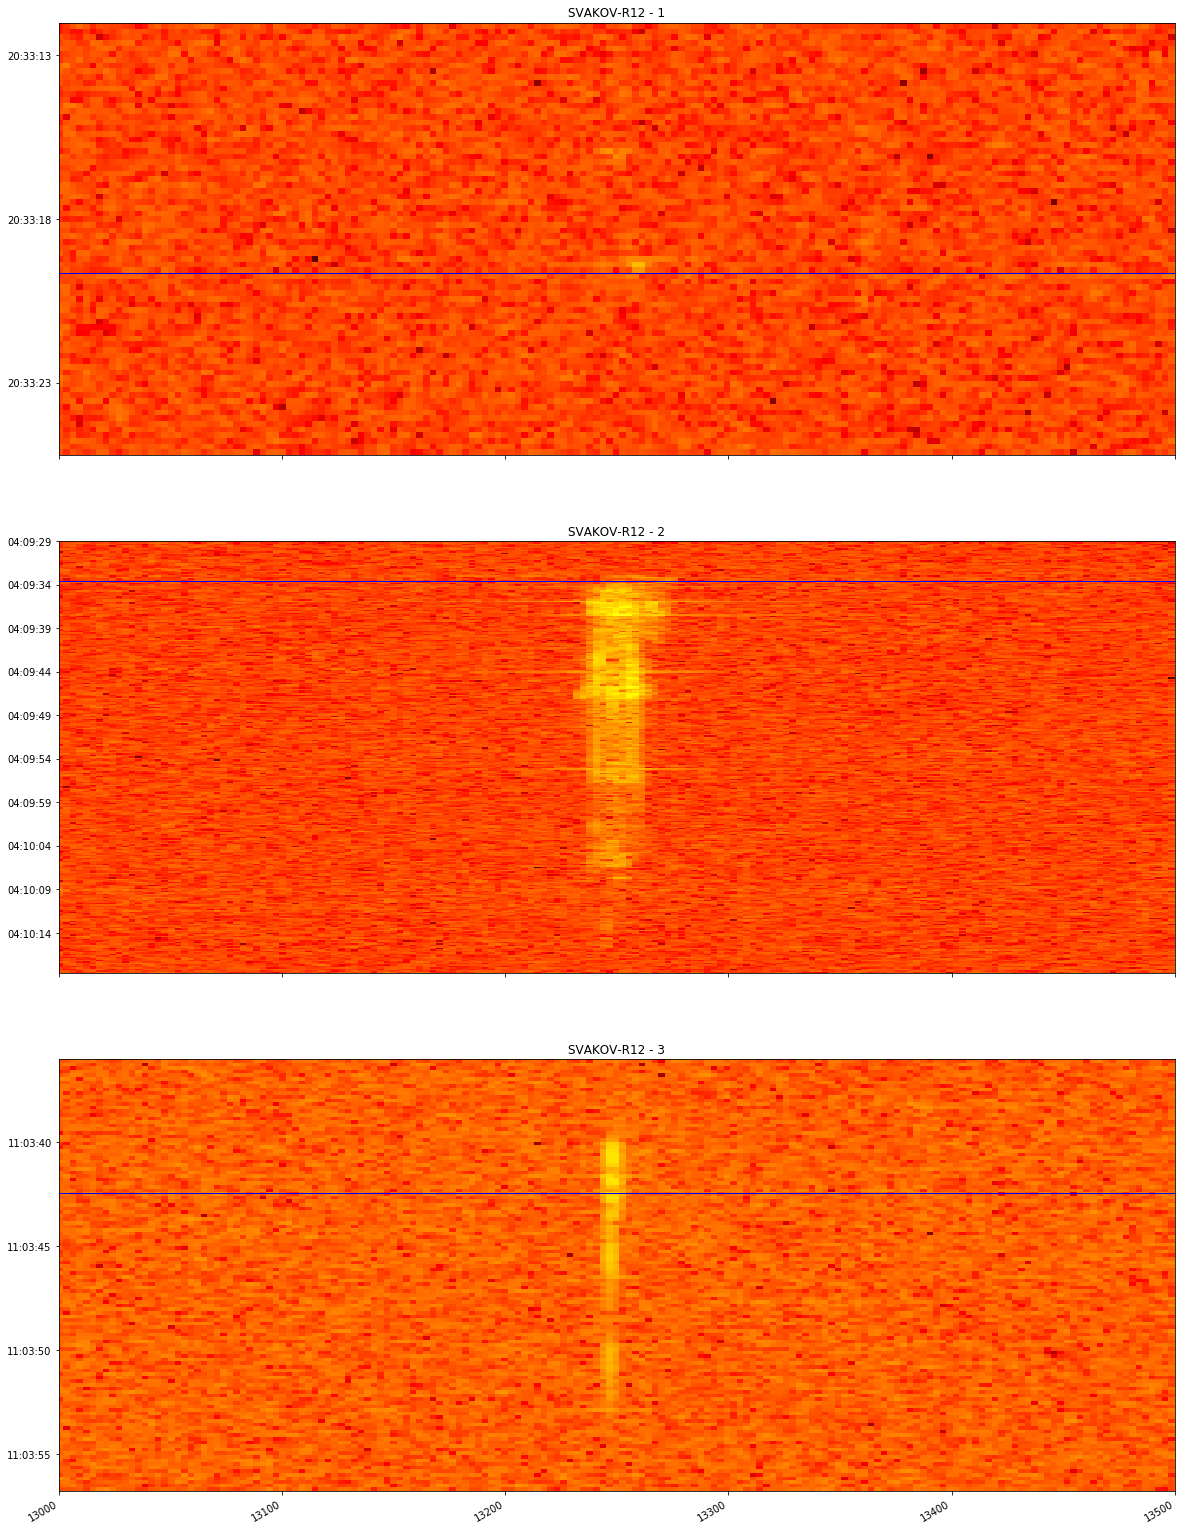

In [22]:
f = pylab.figure(figsize=(20, 30))
#plt.figure(figsize=(10, 5))


for n, fname in enumerate(raw_files):
    try:
        ax = f.add_subplot(len(raw_files), 1, n + 1)
        
        hdu = fits.open(fname[0])[0]
        d1 = dateutil.parser.parse(hdu.header['DATE'])
        d2 = d1 + datetime.timedelta(seconds=hdu.header['NAXIS2']/48000.0)
        fds1 = dates.date2num(d1) # converted
        fds2 = dates.date2num(d2) # converted
        
        flat_data = np.ravel(hdu.data)
        arr = waterfall(flat_data[0::2] + 1j * flat_data[1::2], 48000, bins = 4096*4)
        pylab.imshow(arr,  interpolation='none', aspect='auto',  extent=[-24000, 24000, fds2, fds1])
        plt.xlim(13000,13500)
        
        ax = pylab.gca()
        ax.yaxis_date()
        date_format = md.DateFormatter('%H:%M:%S')
        ax.yaxis.set_major_formatter(date_format)
        f.autofmt_xdate()

        d1 = dateutil.parser.parse(hdu.header['DATE'])
        d2 = d1 + datetime.timedelta(seconds=hdu.header['NAXIS2']/48000.0)
        fds1 = dates.date2num(d1) # converted
        fds2 = dates.date2num(d2) # converted

        gps_marks = getTimeOfGPS(flat_data)
        gps_marks_abs = []
        for time in gps_marks:
            plt.axhline(y=dates.date2num(d1 + datetime.timedelta(seconds=time)), color='blue', linewidth=1)
            gps_marks_abs.append( datetime.datetime.fromtimestamp(round((d1 + datetime.timedelta(seconds=gps_marks[0])).timestamp(),-1)) )  

        first_row = gps_marks_abs[0]-datetime.timedelta(seconds=gps_marks[0])
        print(fname[0])
        print("Vzdálenost první GPS značky od začátku souboru", gps_marks[0], 's')
        print("Začátek souboru", d1)
        print("Konec souboru  ", d2)
        print("Délka souboru  ", d2-d1)
        print("První čásová značka      ", d1 + datetime.timedelta(seconds=gps_marks[0]), "podle systémového času")
        print("Opravený čas první značky", gps_marks_abs[0])
        print("Opravený čas prvního řádku", first_row)
        print("Začátek souboru           ", d1)
        print("Chyba času v hlavičce fits ", abs(first_row-d1))

        pylab.set_cmap('hot')
        pylab.title(fname[1])
        print("=========================")
    except Exception as e:
        print(e)
    
pylab.show()
